In [1]:
import pandas as pd

hash_df = pd.read_csv('BCHAIN-HRATE.csv', index_col=0)
hash_df.columns = ['BCHAIN-HRATE.csv'.replace('.csv', '').replace('BCHAIN-', '')] 
hash_df

HRATE
Date                    
2022-11-16  2.741188e+08
2022-11-15  2.832561e+08
2022-11-14  2.247774e+08
2022-11-13  2.357422e+08
2022-11-12  3.051856e+08
...                  ...
2009-01-07  0.000000e+00
2009-01-06  0.000000e+00
2009-01-05  0.000000e+00
2009-01-04  0.000000e+00
2009-01-03  0.000000e+00

[5066 rows x 1 columns]

In [2]:
import pandas as pd  
from pandas_datareader import data as pdr 
import datetime
import yfinance as yf
import numpy as np

#BTCのチャートを取得
tickers = ['BTC-USD']

#取得開始日を入力
start = "2009-01-01"

#取得終了日を入力
end = datetime.date.today()

#Yahoofinanceから取得するように設定
yf.pdr_override()

#データの取得を実行
crypto_data = pdr.get_data_yahoo(tickers, start, end)
crypto_data

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-11-14  16352.028320  17109.324219  15872.941406  16618.199219   
2022-11-15  16617.484375  17051.962891  16542.550781  16884.613281   
2022-11-16  16884.341797  16960.294922  16430.111328  16669.439453   
2022-11-17  16670.425781  16726.439453  16460.683594  16687.517578   
2022-11-18  16687.912109  16947.058594  16564.611328  16697.777344   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2022-11-14  16618.199219  49630243054  
2022-11-15  16884.613281  36599436183  
2022-11-16  16669.439453  33925512989  
2022-11-17  16687.517578  27868914022  
2022-11-18  16697.777344  26862218609  

[2985 rows x 6 columns]

In [3]:
hash_df.index = pd.to_datetime(hash_df.index)
crypto_data_con = pd.concat([crypto_data,hash_df],axis=1)
crypto_data_con = crypto_data_con.dropna()
crypto_data_con

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-11-12  17036.875000  17066.675781  16651.775391  16799.185547   
2022-11-13  16799.722656  16920.765625  16320.634766  16353.365234   
2022-11-14  16352.028320  17109.324219  15872.941406  16618.199219   
2022-11-15  16617.484375  17051.962891  16542.550781  16884.613281   
2022-11-16  16884.341797  16960.294922  16430.111328  16669.439453   

               Adj Close        Volume         HRATE  
Date                                                  
2014-09-17    457.334015  2.105680e+07  2.743262e+05  
2014-09-18    424.440002  3.448320e+07  2.402207e+05  
2014-09-19    394.795990  3.791970e+07  2.402207e+05  
2014-09-20    408.903992  3.686360e+07  2.594977e+05  
2014-09-21    398.821014  2.658010e+07  2.328065e+05  
...                  ...           ...           ...  
2022-11-12  16799.185547  2.971770e+10  3.051856e+08  
2022-11-13  16353.365234  2.720918e+10  2.357422e+08  
2022-11-14  16618.199219  4.963024e+10  2.247774e+08  
2022-11-15  16884.613281  3.659944e+10  2.832561e+08  
2022-11-16  16669.439453  3.392551e+10  2.741188e+08  

[2983 rows x 7 columns]

In [4]:
crypto_data_con = crypto_data_con.drop(columns=['Open','High', 'Low', 'Close'])

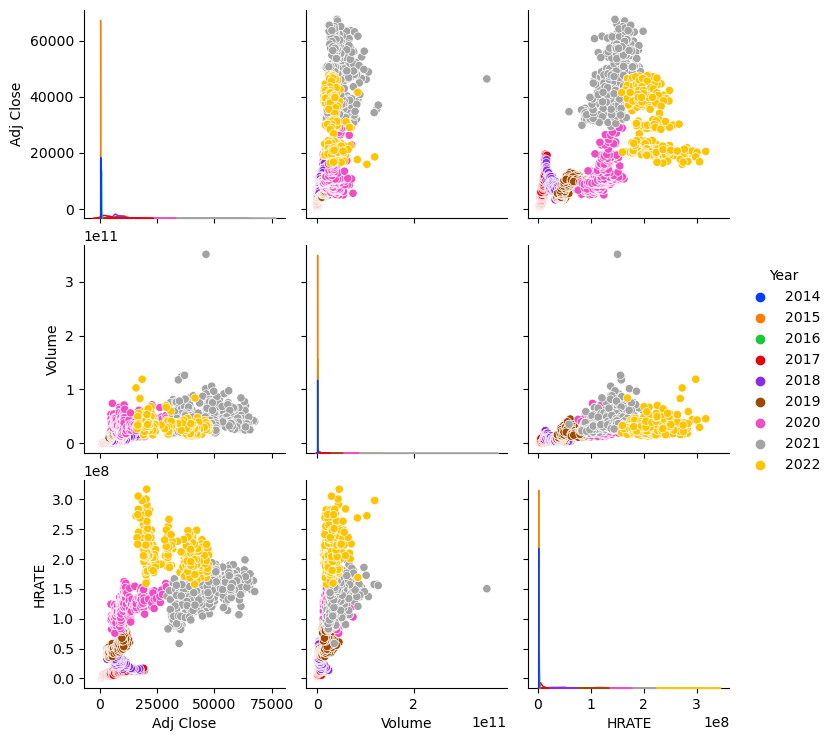

In [5]:
import seaborn as sns

plot_data = crypto_data_con
plot_data['Year'] = crypto_data_con.index.year
pg = sns.pairplot(plot_data,hue ='Year',palette = 'bright')

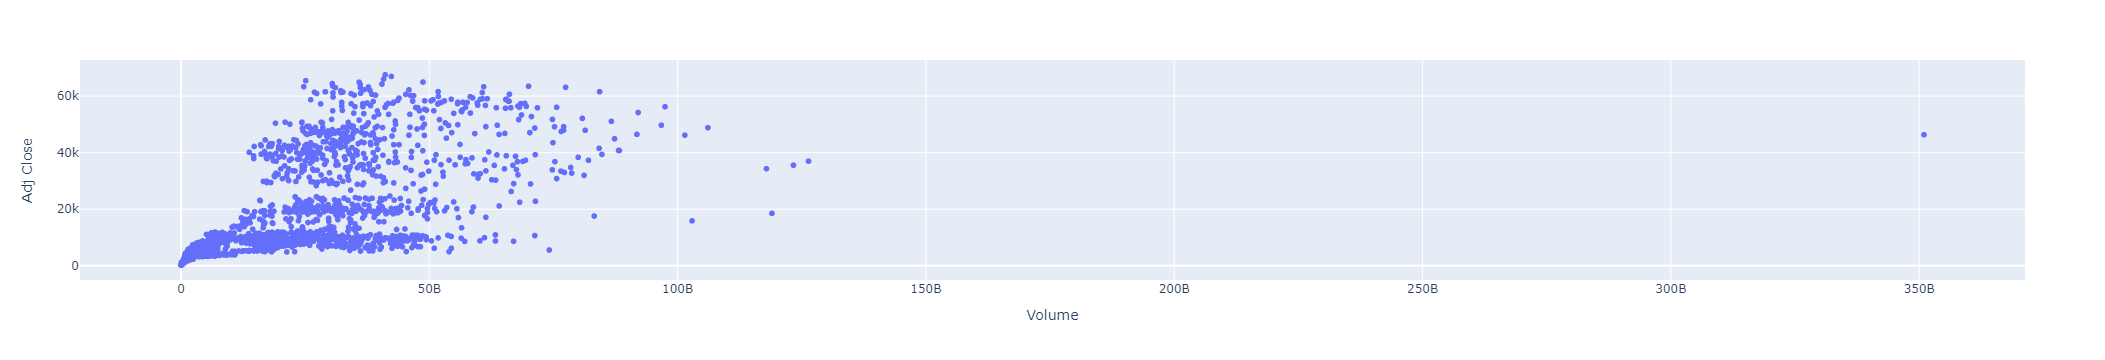

In [6]:
import plotly.express as px


#散布図表示
fig = px.scatter(crypto_data_con, x="Volume", y="Adj Close")
fig.show()

In [7]:
#外れ値の処理
crypto_data_con['Volume(No outliers)'] = crypto_data_con['Volume'].where(crypto_data_con['Volume'] < 2*10**11)

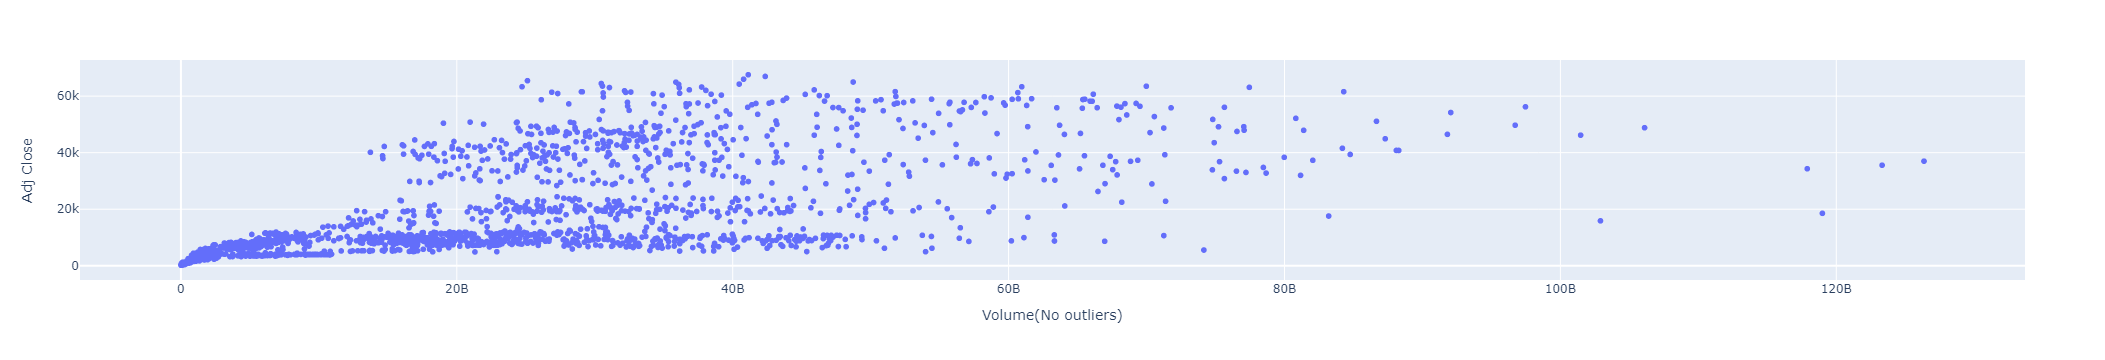

In [8]:
#散布図表示
fig = px.scatter(crypto_data_con, x="Volume(No outliers)", y="Adj Close")
fig.show()

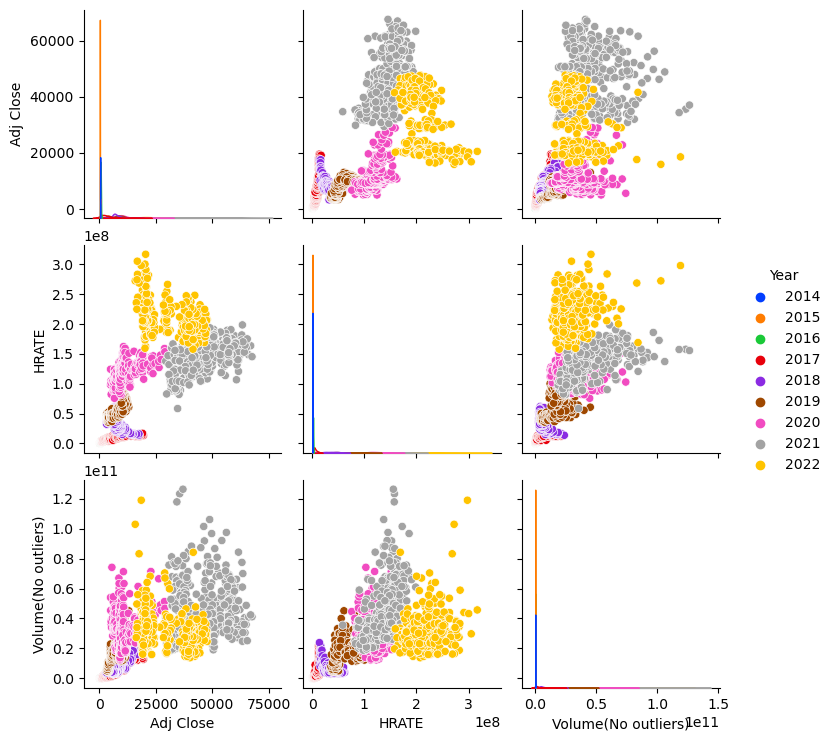

In [9]:
#再度プロット
plot_data = crypto_data_con.drop(columns=['Volume'])
plot_data['Year'] = crypto_data_con.index.year
pg = sns.pairplot(plot_data,hue ='Year',palette = 'bright')

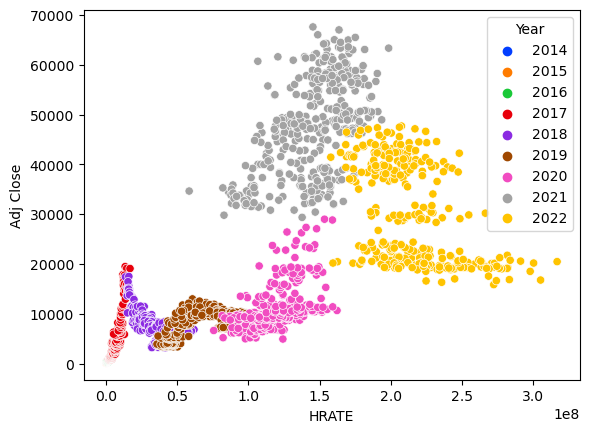

In [24]:
#ハッシュレートとビットコインの価格のみの散布図
pg = sns.scatterplot(x="HRATE", y="Adj Close",data=plot_data,hue='Year',palette = 'bright')

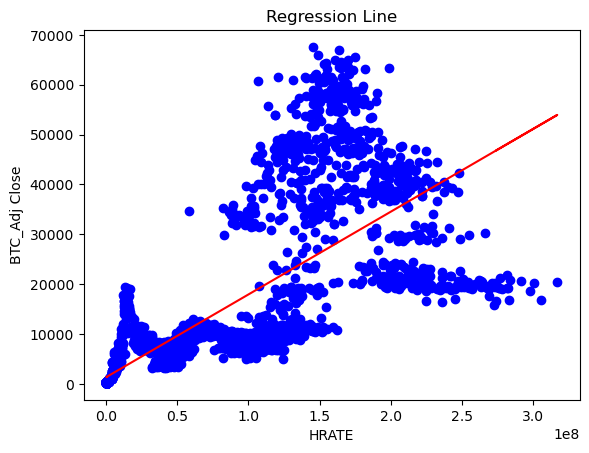

In [42]:
#線形回帰でFitting
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = plot_data['HRATE'].values
X = np.array(X).reshape(-1,1)
Y = plot_data['Adj Close'].values 
lr.fit(X, Y) 
plt.scatter(X, Y, color = 'blue')         
plt.plot(X, lr.predict(X), color = 'red') 

plt.title('Regression Line')              
plt.xlabel('HRATE') 
plt.ylabel('BTC_Adj Close')                                  

plt.show()                                 

In [41]:
X_pred = X[-1]
X_pred= np.array(X_pred).reshape(-1,1)
Y_pred = lr.predict(X_pred)
print(X[-1][0],Y_pred[0])

274118822.31660694 46841.5553871364


In [32]:
X

array([2.74326154e+05, 2.40220740e+05, 2.40220740e+05, ...,
       2.24777434e+08, 2.83256116e+08, 2.74118822e+08])

In [20]:
corr_df =  crypto_data_con.drop(columns=['Volume','Year'])
corr_df.corr()

Adj Close     HRATE  Volume(No outliers)
Adj Close             1.000000  0.756742             0.739750
HRATE                 0.756742  1.000000             0.782214
Volume(No outliers)   0.739750  0.782214             1.000000

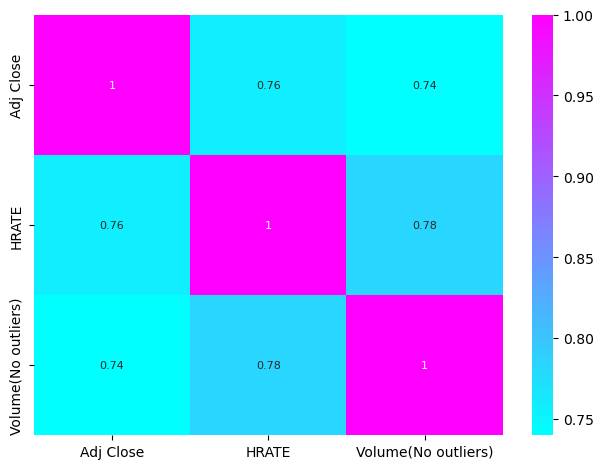

In [21]:
# データ前処理
import numpy as np
import pandas as pd

# データ可視化
import seaborn
import matplotlib.pyplot as plt


# ヒートマップ
hm = seaborn.heatmap(corr_df.corr(), 
                     cmap='cool',
                     annot=True, 
                     center=None,
                     fmt='.2g', 
                     annot_kws={'size': 8}, 
                     linewidths=0,
                     linecolor='white', 
                     cbar=True,  
                     xticklabels=list(corr_df.corr().columns),
                     yticklabels=list(corr_df.corr().columns),
                     )

# グラフ可視化
plt.tight_layout()
plt.show()